<a href="https://colab.research.google.com/github/SKawsar/deep_learning_PyTorch/blob/main/PyTorch_Logistic_Regression_(With_Logits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load in the data
from sklearn.datasets import load_breast_cancer

In [67]:
# load the data
data = load_breast_cancer()

In [68]:
# check the type of 'data'
type(data)

sklearn.utils.Bunch

In [69]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [70]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [71]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [72]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [73]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [74]:
# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, stratify=data.target, random_state=42)
N, D = X_train.shape

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(381, 30) (188, 30) (381,) (188,)


In [75]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([381, 30]) torch.Size([188, 30]) torch.Size([381, 1]) torch.Size([188, 1])


In [77]:
# Now all the fun PyTorch stuff
# Build the model
model = nn.Linear(D, 1)

BCE Loss with Logits

Why? Numerical instability. Exponentiating things leads to very large numbers (larger than a computer can represent).

In [78]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [79]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.4275, Test Loss: 0.4412
Epoch 100/1000, Train Loss: 0.3209, Test Loss: 0.3372
Epoch 150/1000, Train Loss: 0.2609, Test Loss: 0.2787
Epoch 200/1000, Train Loss: 0.2224, Test Loss: 0.2403
Epoch 250/1000, Train Loss: 0.1956, Test Loss: 0.2131
Epoch 300/1000, Train Loss: 0.1760, Test Loss: 0.1927
Epoch 350/1000, Train Loss: 0.1610, Test Loss: 0.1768
Epoch 400/1000, Train Loss: 0.1492, Test Loss: 0.1641
Epoch 450/1000, Train Loss: 0.1396, Test Loss: 0.1536
Epoch 500/1000, Train Loss: 0.1317, Test Loss: 0.1449
Epoch 550/1000, Train Loss: 0.1251, Test Loss: 0.1374
Epoch 600/1000, Train Loss: 0.1194, Test Loss: 0.1310
Epoch 650/1000, Train Loss: 0.1145, Test Loss: 0.1254
Epoch 700/1000, Train Loss: 0.1103, Test Loss: 0.1205
Epoch 750/1000, Train Loss: 0.1065, Test Loss: 0.1161
Epoch 800/1000, Train Loss: 0.1032, Test Loss: 0.1122
Epoch 850/1000, Train Loss: 0.1002, Test Loss: 0.1087
Epoch 900/1000, Train Loss: 0.0976, Test Loss: 0.1055
Epoch 950/1000, Train Loss: 0

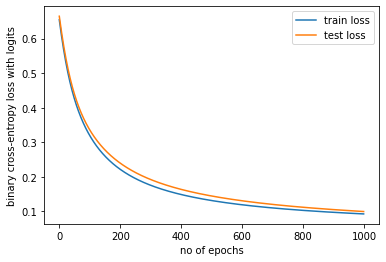

In [80]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.ylabel("binary cross-entropy loss with logits")
plt.xlabel("no of epochs")
plt.legend()
plt.show()

In [81]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  # print(p_train.numpy())
  p_train = (p_train.numpy() > 0)
  # print(p_train)
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9816, Test acc: 0.9734
